In [57]:
import imp
import utils
imp.reload(utils)
from utils import *

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

ip = pd.read_csv('..\data\cleandata\Info pluviometricas\Merged Data\merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(list(ip.columns))
ip.head()

['Data', 'Hora', 'Data / Hora', 'UmidadeRelativa_0', 'PressaoAtmosferica_0', 'Temperatura do Ar_0', 'TemperaturaInterna_0', 'PontoDeOrvalho_0', 'SensacaoTermica_0', 'RadiacaoSolar_0', 'DirecaoDoVento_0', 'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0', 'UmidadeRelativa_1', 'PressaoAtmosferica_1', 'Temperatura do Ar_1', 'TemperaturaInterna_1', 'PontoDeOrvalho_1', 'SensacaoTermica_1', 'RadiacaoSolar_1', 'DirecaoDoVento_1', 'VelocidadeDoVento_1', 'Precipitacao_1', 'Local_1', 'UmidadeRelativa_2', 'PressaoAtmosferica_2', 'Temperatura do Ar_2', 'TemperaturaInterna_2', 'PontoDeOrvalho_2', 'SensacaoTermica_2', 'RadiacaoSolar_2', 'DirecaoDoVento_2', 'VelocidadeDoVento_2', 'Precipitacao_2', 'Local_2', 'UmidadeRelativa_3', 'PressaoAtmosferica_3', 'Temperatura do Ar_3', 'TemperaturaInterna_3', 'PontoDeOrvalho_3', 'SensacaoTermica_3', 'RadiacaoSolar_3', 'DirecaoDoVento_3', 'VelocidadeDoVento_3', 'Precipitacao_3', 'Local_3', 'UmidadeRelativa_4', 'PressaoAtmosferica_4', 'Temperatura do Ar_4', 'Tem

,Data,Hora,Data / Hora,UmidadeRelativa_0,PressaoAtmosferica_0,Temperatura do Ar_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,...,UmidadeRelativa_mean,PressaoAtmosferica_mean,SensacaoTermica_mean,RadiacaoSolar_mean,DirecaoDoVento_mean,VelocidadeDoVento_mean,Precipitacao_mean,PontoDeOrvalho_mean,Temperatura do Ar_mean,TemperaturaInterna_mean
0,30/06/11,23:45:59,30/06/11 23:45:59,81.7,926.8,17.5,19.6,14.4,NaN,0.0,...,83.22,927.70,NaN,0.0,134.8,1.16,0.0,14.24,17.08,20.04
1,30/06/11,23:32:00,30/06/11 23:32:00,84.3,926.8,17.1,19.6,14.4,NaN,0.0,...,84.20,927.70,NaN,0.0,90.0,1.10,0.0,14.20,16.90,20.00
2,30/06/11,23:15:59,30/06/11 23:15:59,82.1,926.9,17.6,19.6,14.6,NaN,0.0,...,84.82,927.80,NaN,0.0,108.6,0.96,0.0,14.28,16.86,20.04
3,30/06/11,23:01:59,30/06/11 23:01:59,83.0,927.0,17.5,19.7,14.5,NaN,0.0,...,84.98,927.82,NaN,0.0,95.0,0.90,0.0,14.22,16.92,20.26
4,30/06/11,22:45:59,30/06/11 22:45:59,82.6,926.8,17.6,19.7,14.6,NaN,0.0,...,84.68,927.70,NaN,0.0,115.6,1.12,0.0,14.24,16.98,20.34


In [ ]:
"""
UmidadeRelativa
PressaoAtmosferica
Temperatura do Ar
TemperaturaInterna
PontoDeOrvalho
SensacaoTermica
RadiacaoSolar
DirecaoDoVento
Precipitacao
""";

#### Umidade Relativa 

In [3]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

,UmidadeRelativa_0,UmidadeRelativa_1,UmidadeRelativa_2,UmidadeRelativa_3,UmidadeRelativa_4,UmidadeRelativa_mean
0,81.7,79.0,83.4,88.6,83.4,83.22
1,84.3,81.0,83.1,88.7,83.9,84.20
2,82.1,86.6,83.7,87.9,83.8,84.82
3,83.0,87.8,82.0,87.5,84.6,84.98
4,82.6,87.8,82.3,87.6,83.1,84.68


In [5]:
um.columns

Index(['UmidadeRelativa_0', 'UmidadeRelativa_1', 'UmidadeRelativa_2',
       'UmidadeRelativa_3', 'UmidadeRelativa_4', 'UmidadeRelativa_mean'],
      dtype='object')

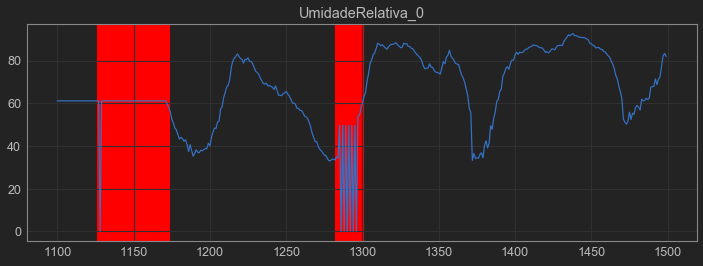

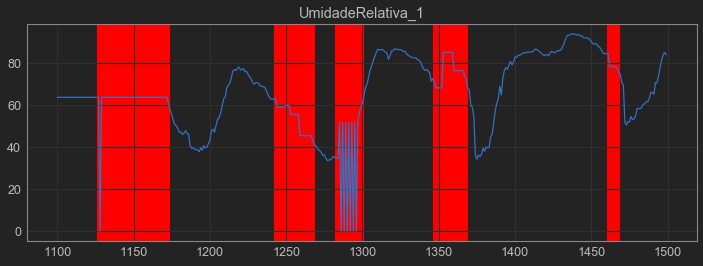

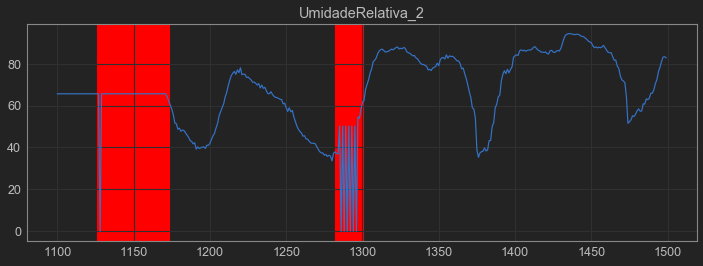

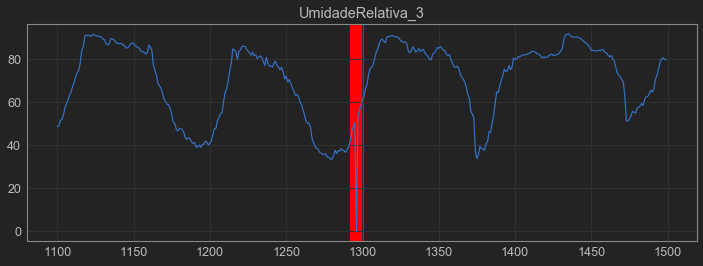

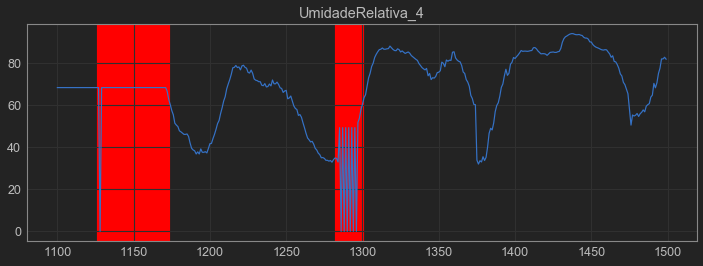

In [26]:
for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col], 15, False, 1000, 1500)
    zeros = derivative_zero(um[col], 3, False, 3000, 3500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, len(um[col]), 1100, 1500, plt_type = 'region', title = col)

#### PressaoAtmosferica

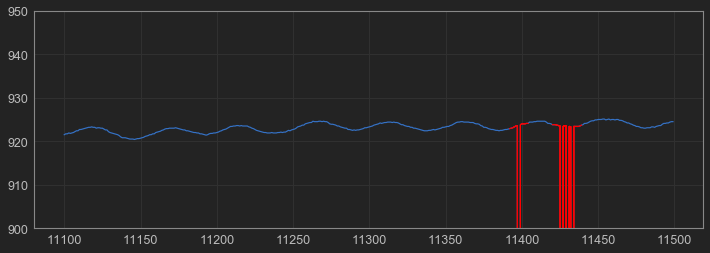

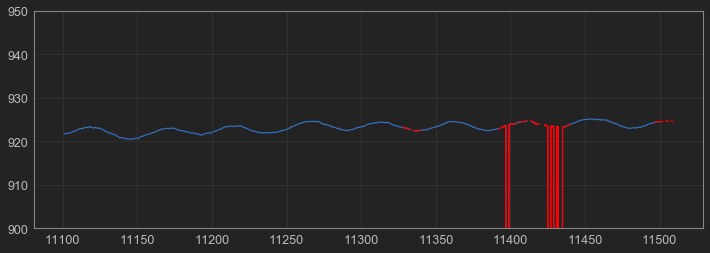

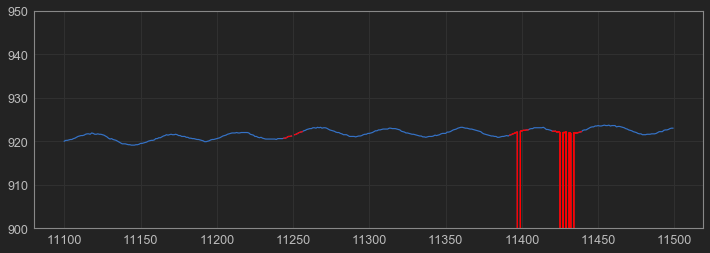

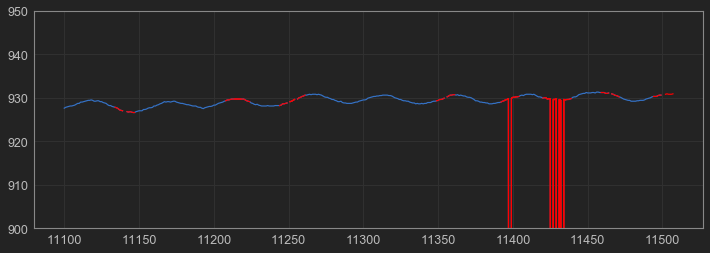

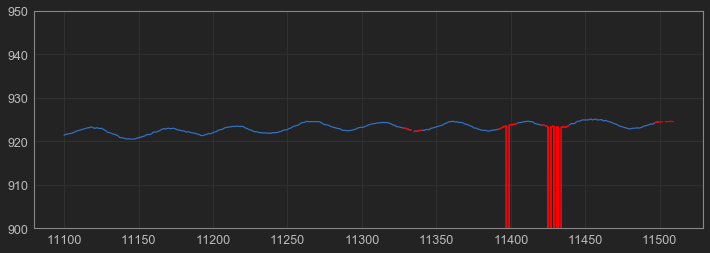

In [66]:
cols_um = [i for i in ip.columns if 'PressaoAtmosferica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col], 50, False, 1000, 1500, ylim = [900, 1000])
    zeros = derivative_zero(um[col], 7, False, 1000, 1500, ylim = [900, 1000])
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(peaks))
    plot_regions(um[col], error_reg, len(um[col]), 11100, 11500, plt_type = 'line', ylim=[900, 950])

#### Temperatura do Ar

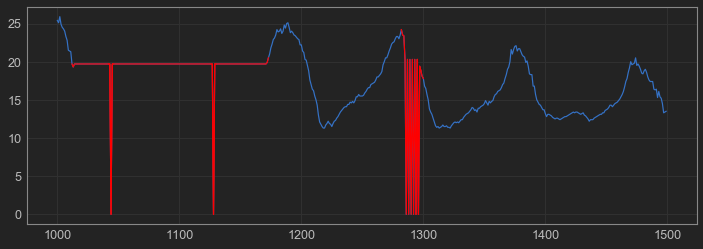

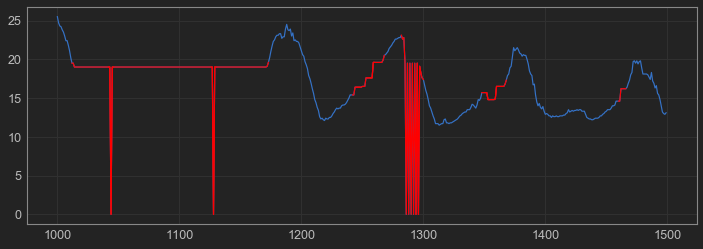

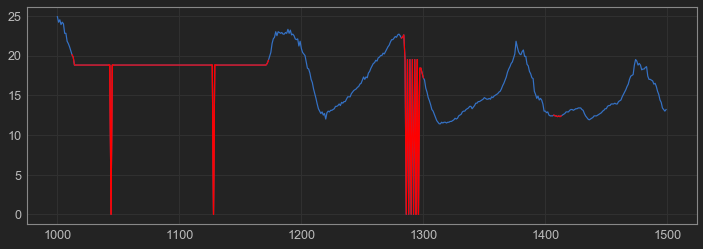

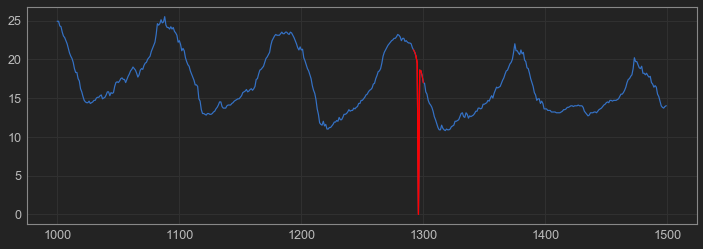

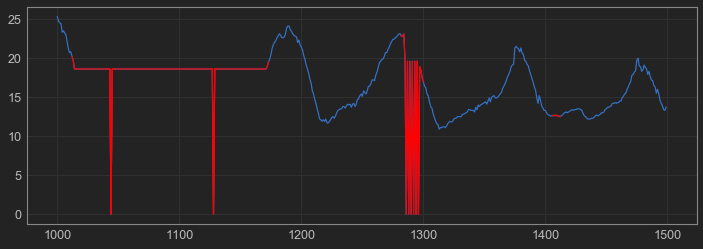

In [68]:
cols_um = [i for i in ip.columns if 'Temperatura do Ar' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, len(um[col]), 1000, 1500, plt_type = 'lines')

#### TemperaturaInterna

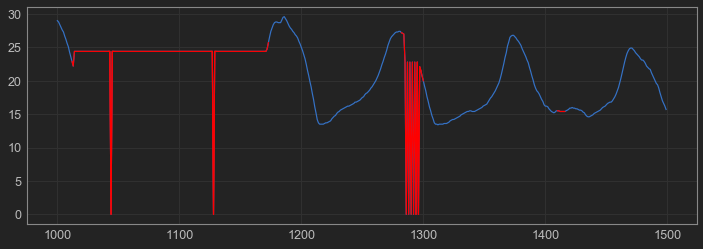

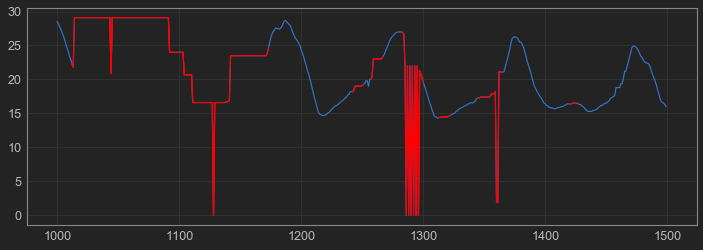

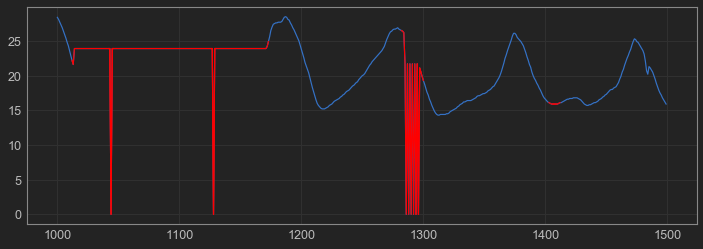

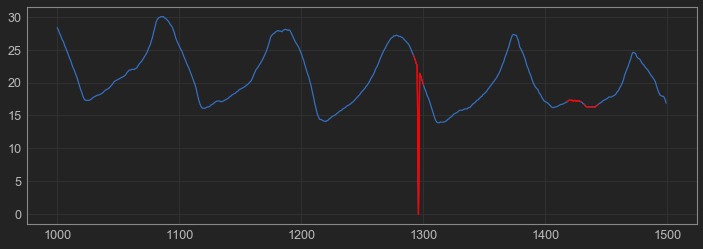

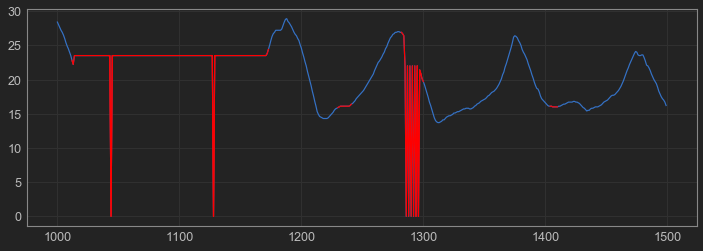

In [69]:
cols_um = [i for i in ip.columns if 'TemperaturaInterna' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, len(um[col]), 1000, 1500, plt_type = ' ')

#### PontoDeOrvalho

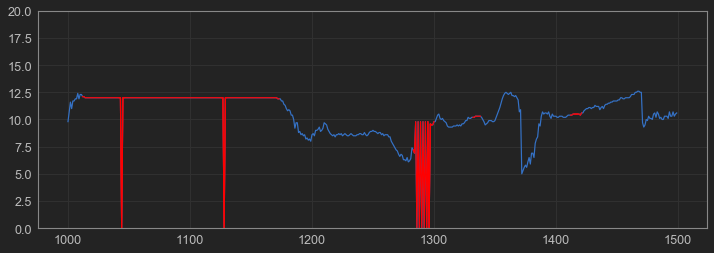

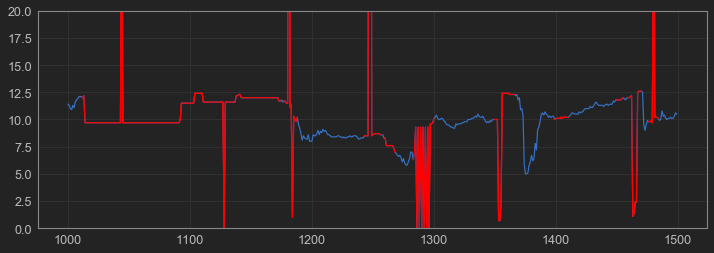

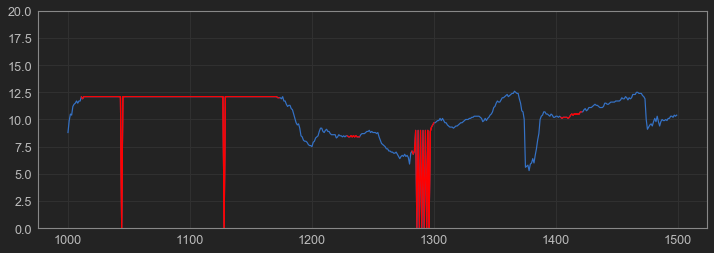

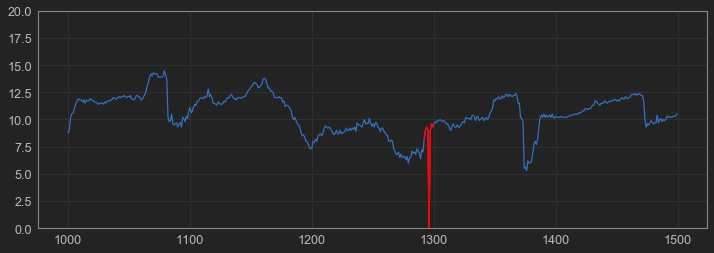

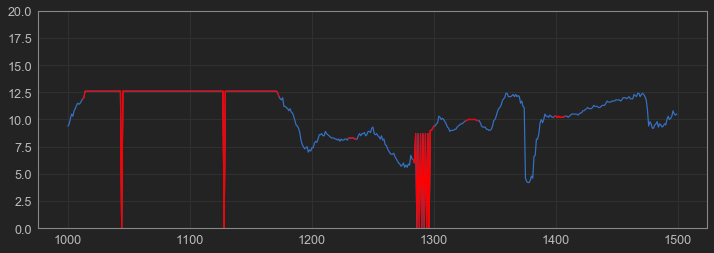

In [71]:
cols_um = [i for i in ip.columns if 'PontoDeOrvalho' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col], 3.5, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, len(um[col]), 1000, 1500, plt_type = ' ', ylim=[0, 20])

#### SensacaoTermica

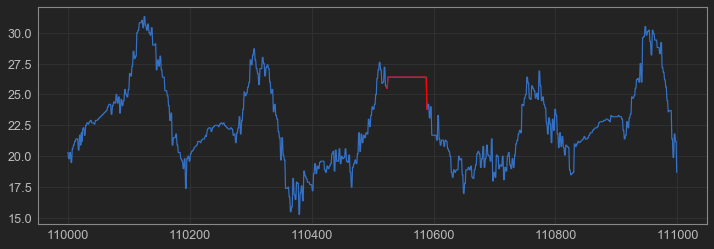

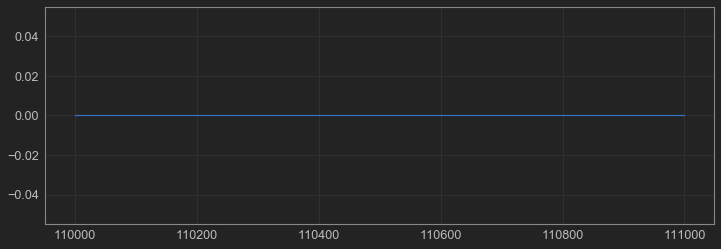

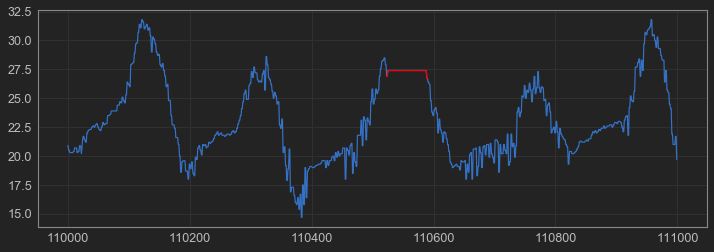

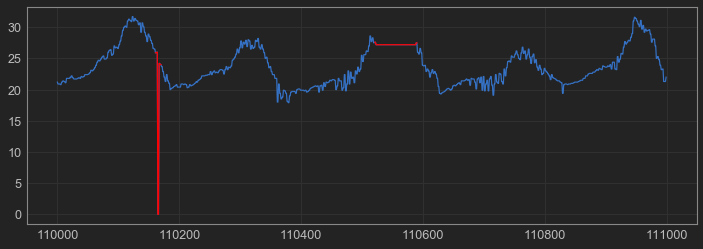

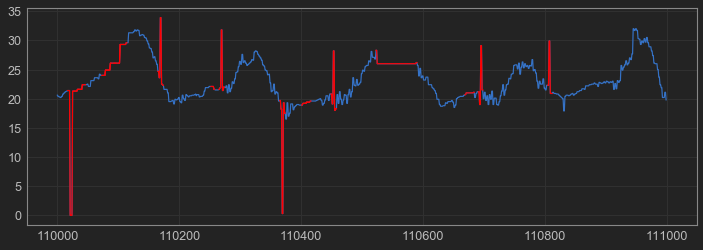

In [83]:
cols_um = [i for i in ip.columns if 'SensacaoTermica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 110000, 110000 + 1000
for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col].fillna(0), 4, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 10, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, len(um[col]), start, stop, plt_type = 'lines')

#### RadiacaoSolar

#### Filtro passa baixa

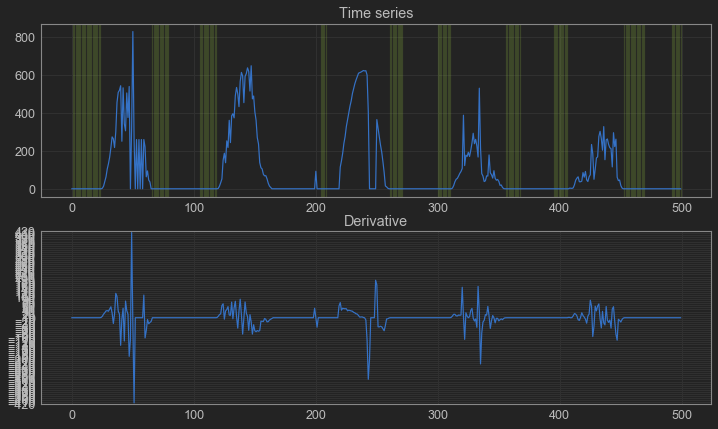

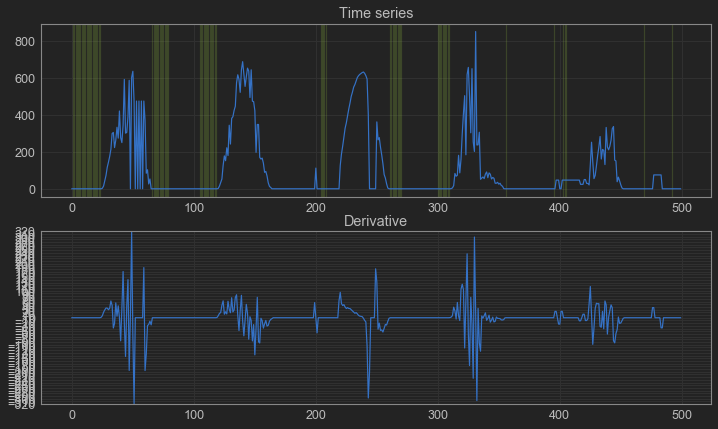

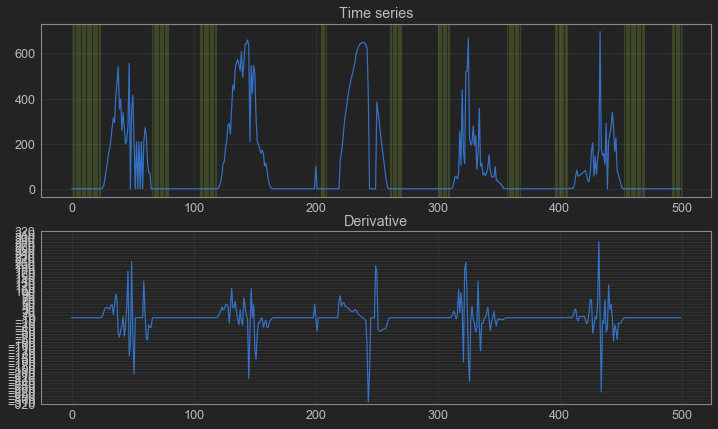

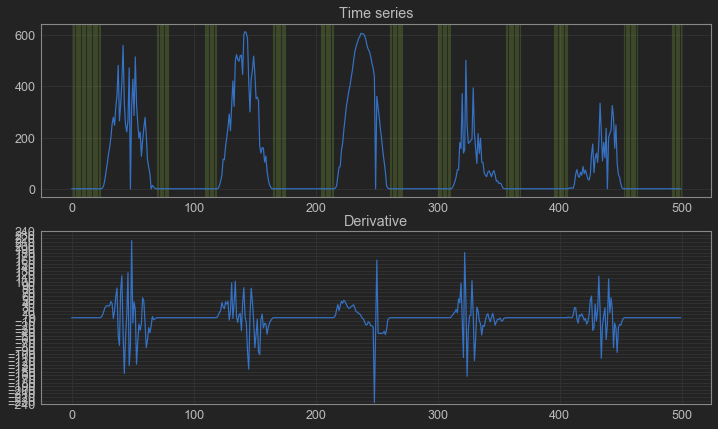

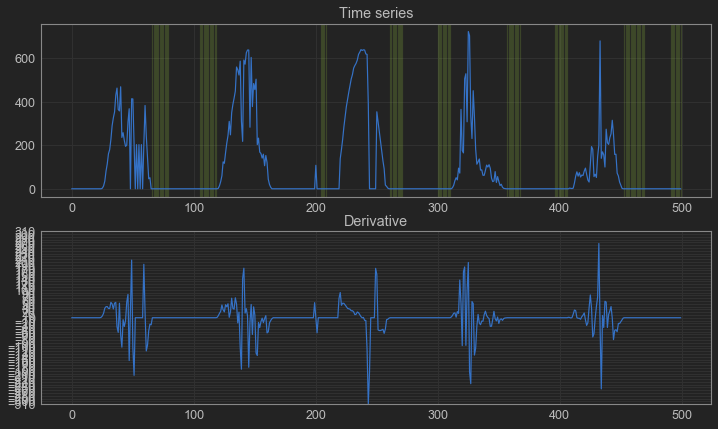

In [94]:
cols_um = [i for i in ip.columns if 'RadiacaoSolar' in i]
um = ip[cols_um]
um.head()
start, stop = 0, 0 + 500
for col in um.columns[:-1]:
    peaks = derivative_threshold(um[col].fillna(0), 120, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 40, True, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, len(um[col]), start, stop, plt_type = 'lines')

#### DirecaoDoVento

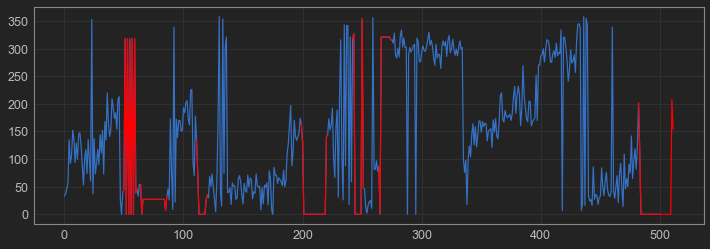

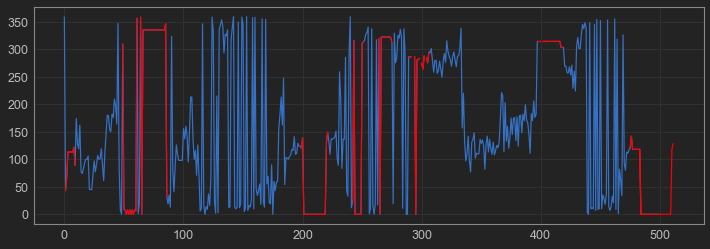

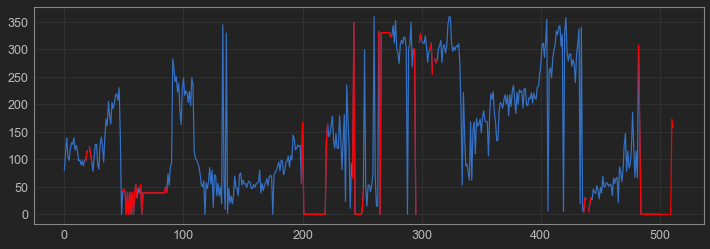

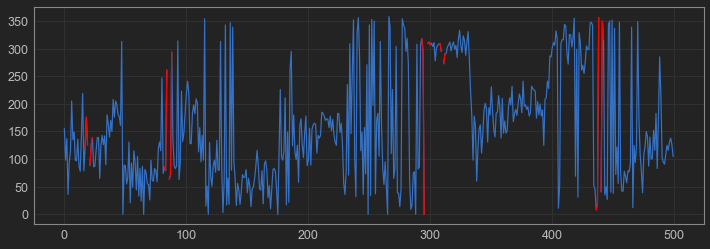

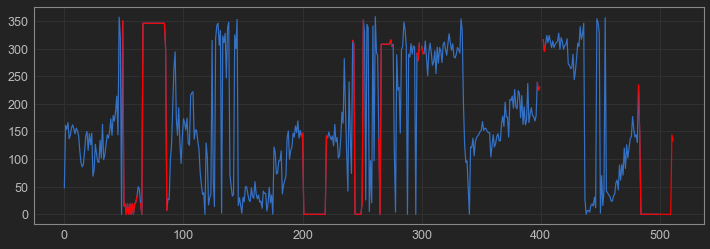

In [106]:
cols_um = [i for i in ip.columns if 'DirecaoDoVento' in i]
um = ip[cols_um]
um.head()
start, stop = 0, 0 + 500
for col in um.columns[:-1]:
    #peaks = derivative_threshold(um[col].fillna(0), 120, True, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 3, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or nans[i] for i in range(len(zeros))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(zeros))
    plot_regions(um[col], error_reg, len(um[col]), start, stop, plt_type = 'lines')

#### Precipitacao

In [140]:
um[cols_um].max()

Precipitacao_0       57.00
Precipitacao_1       65.20
Precipitacao_2       66.60
Precipitacao_3       80.00
Precipitacao_4       68.10
Precipitacao_mean    51.86
dtype: float64

In [141]:
cols_um = [i for i in ip.columns if 'Precipitacao' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 15000, 20000
max_ = 0
for col in um.columns[:-1]:
    print(um[col].nlargest(5))

    #zeros = derivative_zero(um[col].fillna(0), 10, False, start, stop)
    #nans = um[col].isna()
    #error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    #error_reg = list_2_regions(error)
    #error_reg = increase_margins(3, error_reg, len(peaks))
    #plot_regions(um[col].fillna(0), error_reg, len(um[col]), start, stop, plt_type = 'lines')

15694     57.0
15695     55.6
121180    52.6
122478    51.2
9410      50.8
Name: Precipitacao_0, dtype: float64
15694     65.2
118523    64.4
118524    64.4
118521    63.3
118522    63.3
Name: Precipitacao_1, dtype: float64
14272     66.6
14273     65.0
14274     55.9
239252    51.6
230810    50.8
Name: Precipitacao_2, dtype: float64
220256    80.0
220257    80.0
220258    80.0
220259    80.0
238417    56.5
Name: Precipitacao_3, dtype: float64
230810    68.1
366897    62.1
366898    60.5
239252    57.7
230809    55.1
Name: Precipitacao_4, dtype: float64
